<a href="https://colab.research.google.com/github/SVJLucas/ApprAuto2023/blob/main/1_FirstEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary Work



## 1. Let's download the libraries we'll be using

In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.3 MB/s eta 0:00:00


## 2. Let's import the libraries

Libraries for data visualization:

In [ ]:
import numpy as np
import  pandas as pd
import  seaborn as sns
import  scipy.stats as stats
import  matplotlib.pyplot as plt

import  plotly
import  plotly.graph_objs as go
import  plotly.io as pio
from plotly.subplots import make_subplots
import  plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import  cufflinks as cf
import  plotly.figure_factory as ff
from plotly.offline import iplot
from plotly import tools
from ipywidgets import widgets

from feature_engine import transformation as vt
from matplotlib.colors import to_rgba

plt.style.use('seaborn-darkgrid')

# You can go offline on demand by using
cf.go_offline()
# initiate notebook for offline plot
init_notebook_mode(connected=False)

# set some display options:
plt.rcParams['figure.dpi'] = 100
colors = px.colors.qualitative.Prism
pio.templates.default = "plotly_white"
plotly.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

<ipython-input-2-3b25e79e5377>:22: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



Libraries for data analysis:

In [ ]:
from sklearn.model_selection import train_test_split
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import WoEEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.imputation import AddMissingIndicator
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures

# Let's import the data

Let's authenticate and access google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once we have access to the drive, let's acquire the data:

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML-3A/Data/regularite-mensuelle-tgv-aqst.csv',
                 sep=';')
data

date   service         gare_depart         gare_arrivee  \
0     2018-01  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE   
1     2018-01  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE   
2     2018-01  National  PARIS MONTPARNASSE              QUIMPER   
3     2018-01  National  PARIS MONTPARNASSE              ST MALO   
4     2018-01  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS   
...       ...       ...                 ...                  ...   
8149  2023-06  National          STRASBOURG            PARIS EST   
8150  2023-06  National   TOULOUSE MATABIAU   PARIS MONTPARNASSE   
8151  2023-06  National               TOURS   PARIS MONTPARNASSE   
8152  2023-06  National  VALENCE ALIXAN TGV           PARIS LYON   
8153  2023-06  National              VANNES   PARIS MONTPARNASSE   

      duree_moyenne  nb_train_prevu  nb_annulation  commentaire_annulation  \
0               141             870              5                     NaN   
1               165             222              0                     NaN   
2               220             248              1                     NaN   
3               156             102              0                     NaN   
4                61             391              2                     NaN   
...             ...             ...            ...                     ...   
8149            114             492              2                     NaN   
8150            273             215              0                     NaN   
8151             78             192              1                     NaN   
8152            133             440              2                     NaN   
8153            167             284              0                     NaN   

      nb_train_depart_retard  retard_moyen_depart  ...  \
0                        289            11.247809  ...   
1                          8             2.875000  ...   
2                         37             9.501351  ...   
3                         12            19.912500  ...   
4                         61             7.796995  ...   
...                      ...                  ...  ...   
8149                     273            11.989927  ...   
8150                      24            28.730556  ...   
8151                      20            31.281667  ...   
8152                     347            13.517051  ...   
8153                     154             6.480628  ...   

      nb_train_retard_sup_15  retard_moyen_trains_retard_sup15  \
0                        110                          6.511118   
1                         22                          5.696096   
2                         26                          7.548387   
3                          8                          6.724757   
4                         17                          3.346487   
...                      ...                               ...   
8149                      80                         35.446667   
8150                      36                         76.688889   
8151                      13                         97.394872   
8152                      96                         47.424479   
8153                      34                         49.740686   

      nb_train_retard_sup_30  nb_train_retard_sup_60  prct_cause_externe  \
0                         44                       8           36.134454   
1                          5                       0           15.384615   
2                         17                       7           26.923077   
3                          6                       4           23.076923   
4                          6                       0           21.212121   
...                      ...                     ...                 ...   
8149                      31                      10            7.619048   
8150                      24                      10           13.888889   
8151                       7                       5           14.285714   
8152 

In [ ]:
def add_month_year_columns(df):
    # Convert 'date' to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Extract month and year from 'date' and assign to new columns
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    # Drop the original 'date' column
    df = df.drop(columns=['date'])

    # Rearrange columns to place 'Year' and 'Month' at the beginning
    column_order = ['year', 'month'] + [col for col in df if col not in ['Month', 'Year', 'year', 'month']]
    df = df[column_order]

    return df

In [ ]:
data = add_month_year_columns(data)

In [ ]:
data[(data['gare_depart']=='BORDEAUX ST JEAN')&(data['gare_arrivee']=='PARIS MONTPARNASSE')]

year  month   service       gare_depart        gare_arrivee  \
0     2018      1  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
181   2018      2  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
262   2018      3  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
453   2018      4  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
521   2018      5  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
...    ...    ...       ...               ...                 ...   
7650  2023      2  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
7700  2023      3  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
7841  2023      4  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
7977  2023      5  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   
8131  2023      6  National  BORDEAUX ST JEAN  PARIS MONTPARNASSE   

      duree_moyenne  nb_train_prevu  nb_annulation  commentaire_annulation  \
0               141             870              5                     NaN   
181             140             824             62                     NaN   
262             141             878             35                     NaN   
453             141             841            279                     NaN   
521             140             844            252                     NaN   
...             ...             ...            ...                     ...   
7650            140             964             46                     NaN   
7700            140            1066            297                     NaN   
7841            141            1034             60                     NaN   
7977            141             933              0                     NaN   
8131            141            1052              0                     NaN   

      nb_train_depart_retard  ...  nb_train_retard_sup_15  \
0                        289  ...                     110   
181                      306  ...                     162   
262                      303  ...                      88   
453                      200  ...                      79   
521                      107  ...                      59   
...                      ...  ...                     ...   
7650                     309  ...                      75   
7700                     215  ...                      92   
7841                     339  ...                     116   
7977                     327  ...                      88   
8131                     421  ...                     136   

      retard_moyen_trains_retard_sup15  nb_train_retard_sup_30  \
0                             6.511118                      44   
181                          12.866754                      86   
262                           6.198497                      38   
453                           6.522420                      29   
521                           5.222072                      19   
...                                ...                     ...   
7650                         32.280222                      29   
7700                         36.355072                      29   
7841                         55.020546                      55   
7977                         41.939962                      39   
8131                         59.942157                      78   

      nb_train_retard_sup_60  prct_cause_externe  prct_cause_infra  \
0                          8           36.134454         31.092437   
181                       36           51.785714         19.642857   
262                       12           31.192661         32.110092   
453                        5           40.217391         18.478261   
521                        5           20.652174         25.000000   
...                      ...                 ...               ...   
7650                       4           19.000000         24.000000   
7700                      19           38.738739         27.927928   
7841                      24           20.143885         33.093525   
7977          

In [ ]:
def create_lagged_features(df: pd.DataFrame, lag: int = 1) -> pd.DataFrame:
    """
    Create lagged features for a dataframe based on (gare_depart, gare_arrivee) pairs.

    Args:
        df: The input dataframe.
        lag: The number of lags to be created (default is 1).

    Returns:
        A dataframe with lagged features.
    """

    # List of columns that will not be lagged
    non_lagged_columns = ['gare_depart', 'gare_arrivee', 'month', 'year']

    # Columns to be lagged
    lag_columns = [col for col in df.columns if col not in non_lagged_columns]

    # Function to apply the lag
    def apply_lag(group: pd.DataFrame) -> pd.DataFrame:
        for col in lag_columns:
            group[f'{col}_lag{lag}'] = group[col].shift(lag)
        return group

    # Group by 'gare_depart' and 'gare_arrivee' and apply the lag
    df = df.groupby(['gare_depart', 'gare_arrivee']).apply(apply_lag)

    return df.reset_index(drop=True)

In [ ]:
data = create_lagged_features(data)

<ipython-input-10-d7fd0cc5bddd>:26: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



Let's now understand the meaning of each column:




### Train Data Field Descriptions

| Variable                                           | Type          | Description                                                                                   |
|----------------------------------------------------|---------------|-----------------------------------------------------------------------------------------------|
| Date                                               | Date          | Date field of type date                                                                        |
| Service                                            | Text          | Indicates whether the service is National or International                                      |
| Departure Station                                  | Text          | Text field for the departing station                                                            |
| Arrival Station                                    | Text          | Text field for the arriving station                                                             |
| Average Duration of Journey                        | Integer       | Average planned duration of the journey, in minutes                                             |
| Number of Scheduled Trains                         | Integer       | Number of trains planned                                                                        |
| Number of Cancelled Trains                         | Integer       | Number of cancelled trains                                                                      |
| Cancellation Comments                              | Optional Text | Optional text field for comments on cancellations                                               |
| Number of Trains Delayed at Departure              | Integer       | Number of trains delayed at departure                                                           |
| Average Delay of Trains Delayed at Departure       | Double        | Average delay of trains delayed at departure, in minutes                                        |
| Average Delay of All Trains at Departure           | Double        | Average delay of all trains at departure, in minutes                                            |
| Comments on Departure Delays                       | Optional Text | Optional text field for comments on departure delays                                             |
| Number of Trains Delayed on Arrival                | Integer       | Number of trains delayed on arrival                                                             |
| Average Delay of Trains Delayed on Arrival         | Double        | Average delay of trains delayed on arrival, in minutes                                          |
| Average Delay of All Trains on Arrival             | Double        | Average delay of all trains on arrival, in minutes                                              |
| Comments on Arrival Delays                         | Optional Text | Optional text field for comments on arrival delays                                               |
| Number of Trains Delayed Over 15 Minutes           | Integer       | Number of trains delayed over 15 minutes, if the route competes with air travel                 |
| Average Delay of Trains Delayed Over 15 Minutes    | Double        | Average delay of trains delayed over 15 minutes, if the route competes with air travel          |
| Number of Trains Delayed Over 30 Minutes           | Integer       | Number of trains delayed over 30 minutes                                                        |
| Number of Trains Delayed Over 60 Minutes           | Integer       | Number of trains delayed over 60 minutes                                                        |
| Percentage of Delays Due to External Causes        | Double        | Percentage of trains delayed due to external causes (weather, obstacles, etc.)                  |
| Percentage of Delays Due to Infrastructure         | Double        | Percentage of trains delayed due to railway infrastructure (maintenance, work)                  |
| Percentage of Delays Due to Traffic Management     | Double        | Percentage of trains delayed due to traffic management                                          |
| Percentage of Delays Due to Rolling Stock          | Double        | Percentage of trains delayed due to rolling stock                                               |
| Percentage of Delays Due to Station Management and Material Reuse | Double | Percentage of trains delayed due to station management and material reuse            |
| Percentage of Delays Due to Passenger Management   | Double        | Percentage of trains delayed due to passenger management (crowding, assistance, etc.)            |


In [ ]:
target_variable_names=['nb_train_retard_sup_15',
                       'retard_moyen_trains_retard_sup15',
                       'nb_train_retard_sup_30',
                       'nb_train_retard_sup_60',
                       'prct_cause_externe',
                       'prct_cause_infra',
                       'prct_cause_gestion_trafic',
                       'prct_cause_materiel_roulant',
                       'prct_cause_gestion_gare',
                       'prct_cause_prise_en_charge_voyageurs']

# First analyses:

## Splitting the data between training and testing:

In [ ]:
def split_dataset(data,target_variable_names,train_ratio=0.7,valid_ratio=0.15):

  X_train,X_valid =np.split(data[data['year']!=2023].sample(frac=1, random_state=42),  [int(train_ratio*len(data))])
  X_test = data[data['year']==2023]

  y_train=X_train[target_variable_names]
  y_valid=X_valid[target_variable_names]
  y_test=X_test[target_variable_names]

  y_train.index=X_train.index
  y_valid.index=X_valid.index
  y_test.index=X_test.index

  X_train.drop(labels=target_variable_names,axis=1,inplace=True)
  X_valid.drop(labels=target_variable_names,axis=1,inplace=True)
  X_test.drop(labels=target_variable_names,axis=1,inplace=True)

  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
data

year  month   service         gare_depart         gare_arrivee  \
0     2018      1  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE   
1     2018      1  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE   
2     2018      1  National  PARIS MONTPARNASSE              QUIMPER   
3     2018      1  National  PARIS MONTPARNASSE              ST MALO   
4     2018      1  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS   
...    ...    ...       ...                 ...                  ...   
8149  2023      6  National          STRASBOURG            PARIS EST   
8150  2023      6  National   TOULOUSE MATABIAU   PARIS MONTPARNASSE   
8151  2023      6  National               TOURS   PARIS MONTPARNASSE   
8152  2023      6  National  VALENCE ALIXAN TGV           PARIS LYON   
8153  2023      6  National              VANNES   PARIS MONTPARNASSE   

      duree_moyenne  nb_train_prevu  nb_annulation  commentaire_annulation  \
0               141             870              5                     NaN   
1               165             222              0                     NaN   
2               220             248              1                     NaN   
3               156             102              0                     NaN   
4                61             391              2                     NaN   
...             ...             ...            ...                     ...   
8149            114             492              2                     NaN   
8150            273             215              0                     NaN   
8151             78             192              1                     NaN   
8152            133             440              2                     NaN   
8153            167             284              0                     NaN   

      nb_train_depart_retard  ...  nb_train_retard_sup_15_lag1  \
0                        289  ...                          NaN   
1                          8  ...                          NaN   
2                         37  ...                          NaN   
3                         12  ...                          NaN   
4                         61  ...                          NaN   
...                      ...  ...                          ...   
8149                     273  ...                         74.0   
8150                      24  ...                         26.0   
8151                      20  ...                          8.0   
8152                     347  ...                         54.0   
8153                     154  ...                         32.0   

      retard_moyen_trains_retard_sup15_lag1  nb_train_retard_sup_30_lag1  \
0                                       NaN                          NaN   
1                                       NaN                          NaN   
2                                       NaN                          NaN   
3                                       NaN                          NaN   
4                                       NaN                          NaN   
...                                     ...                          ...   
8149                              42.895045                         37.0   
8150                              56.163462                         15.0   
8151                              26.529167                          3.0   
8152                              62.171296                         28.0   
8153                              33.443750                         15.0   

      nb_train_retard_sup_60_lag1  prct_cause_externe_lag1  \
0                             NaN                      NaN   
1                             NaN                      NaN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             NaN                      NaN   
...                           ...                      ...   
8149                         14.0                13.043478   
81

In [ ]:
X_train,X_valid,X_test,y_train,y_valid,y_test=split_dataset(data,target_variable_names)

In [ ]:
print(f'Size of X_train: {X_train.shape[0]} \t Size of y_train: {y_train.shape[0]} ')
print(f'Size of X_valid: {X_valid.shape[0]} \t Size of y_valid: {y_valid.shape[0]} ')
print(f'Size of X_test: {X_test.shape[0]} \t Size of y_test: {y_test.shape[0]} ')

Size of X_train: 5707 	 Size of y_train: 5707 
Size of X_valid: 1721 	 Size of y_valid: 1721 
Size of X_test: 726 	 Size of y_test: 726 


Let's save the data separately, i.e. let's save the training, validation and test data:

In [ ]:
X_train[target_variable_names]=y_train[target_variable_names]
X_train.to_csv('/content/drive/MyDrive/ML-3A/Data/train.csv')

X_valid[target_variable_names]=y_valid[target_variable_names]
X_valid.to_csv('/content/drive/MyDrive/ML-3A/Data/validation.csv')

X_test[target_variable_names]=y_test[target_variable_names]
X_test.to_csv('/content/drive/MyDrive/ML-3A/Data/test.csv')

## First Exploratory Analysis:

We are going to carry out an initial exploratory analysis to check whether or not there is any missing data, the percentage of this missing data and the breakdown of the number of categories in each categorical variable:

In [ ]:
def simple_EDA(df):
    #Gráfico de Setores com Percentual de Cada Tipo de Variável
    types=df.dtypes.value_counts().to_frame().rename(index=str,columns={0:'Kind of Variables'}).reset_index()
    types.iplot(kind='pie',
               values='Kind of Variables',
               labels='index',
               title='Distribution of each kind of Variables in the Dataset',
               textinfo='label+text+percent')
    #Gráfico de Barras com a Cardinalidade de Cada Variável]
    try:
        numbers_of_each_categories=[]
        categorical=df.select_dtypes(include='object').fillna('NAN')
        for column in categorical.columns:
            categories=categorical[column].unique().tolist()
            if 'NAN' in categories:
                categories.remove('NAN')
            numbers_of_each_categories.append([column,len(categories)])

        numbers_of_each_categories=pd.DataFrame(numbers_of_each_categories,
                                                columns=['Categorical Variable','Cardinality'])
        px.bar(numbers_of_each_categories,x='Categorical Variable',y='Cardinality',color='Cardinality').show()
    except:
        print('There is any Categorical Variable!')
    #Gráfico de Setores com o Percentual de Falta das 15 maiores variáveis com mais falta
    null_df = round(100*(df.isnull().sum().sort_values(ascending=False)/len(df.index)),2)\
                    .to_frame().rename(columns={0:'Null values percentage'})[:15]
    null_df.reset_index().iplot(kind='pie',
                            labels='index',
                            title='Percentage of Each Category in Relation to the Total Missing Data',
                            textinfo='label+text+percent',
                            values='Null values percentage')

    #HeatMap dos Dados Faltantes
    plt.figure(figsize=(20,8));
    sns.heatmap(df.isnull(), cmap='viridis');
    plt.title('Missing Data in each Variable')
    plt.show()


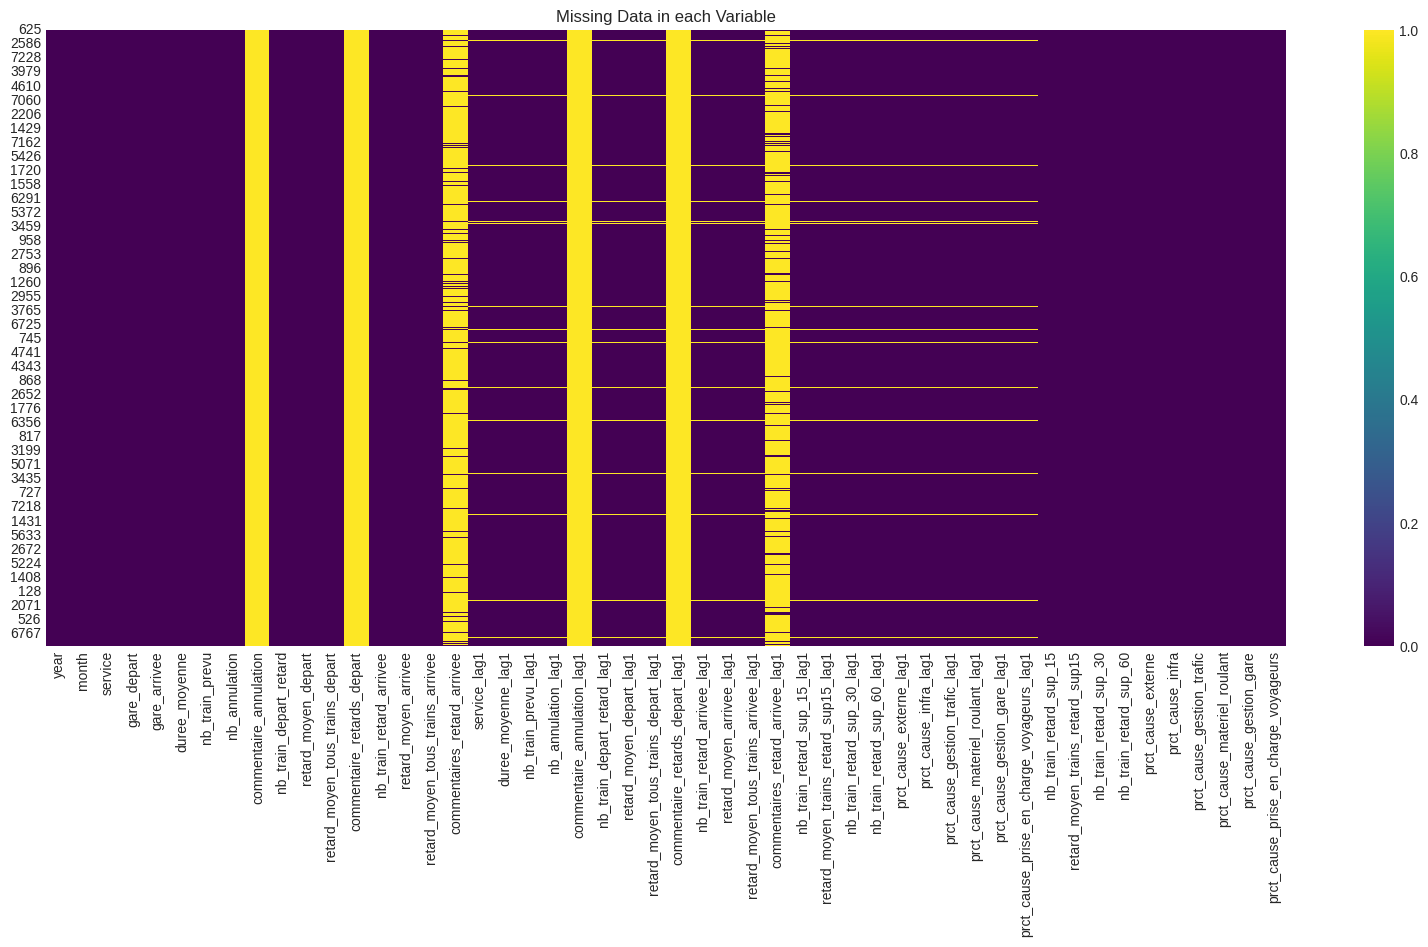

In [ ]:
simple_EDA(X_train)

The first conclusions are:

1. At least 19.2% of the variables in the dataset are categorical. Among the categorical variables, "commentaires_retard_arrivee" displays the highest cardinality with over 200 possible categories. "gare_depart" and "gare_arrivee" have nearly identical cardinalities, both around the 100 mark. In addition to these categorical variables, the dataset also contains continuous numerical and discrete numerical data types, making up 50% and 30.8% respectively.

2. The majority of the missing data is concentrated among three categories: "commentaire_retards_depart" with 34.3%, "commentaire_annulation" with 34.3%, and "commentaires_retard_arrivee" with 31.4%. Combined, these three categories account for nearly the entirety of the missing data.

3. The data for the variables 'commentaire_annulation' and 'commentaire_retards_depart' are entirely absent. These variables can be removed from the dataset without compromising its significance.


## Categorical Variables in the Dataset

Let's verify the existence of rare categorical variables in the data:

In [ ]:
def verify_pct_of_categories(X_train,feature_names, except_features):
  total_samples=len(X_train)
  for feature in feature_names:
    if feature not in except_features:
      temp_df=pd.Series(X_train[feature].value_counts()/total_samples)
      fig=temp_df.sort_values(ascending=False).plot.bar(color="#FFE680")
      fig.axhline(y=0.05,color='red')
      fig.set_ylabel(f'Percentual of {feature}')
      plt.show()

def get_categorical_variables(df):
    return df.select_dtypes(include='object').columns

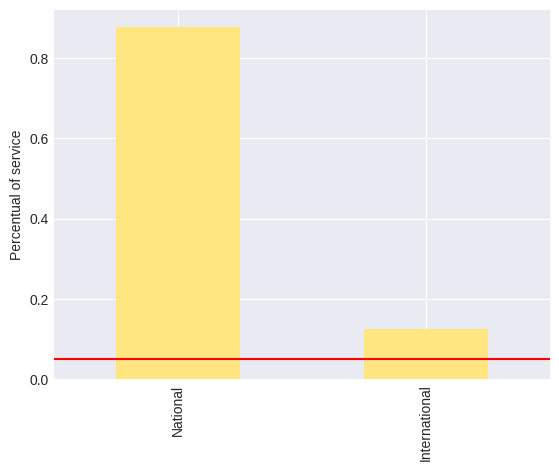

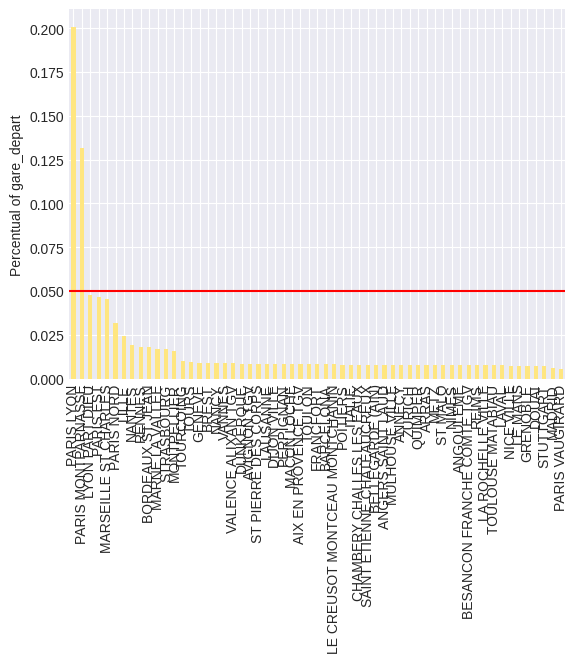

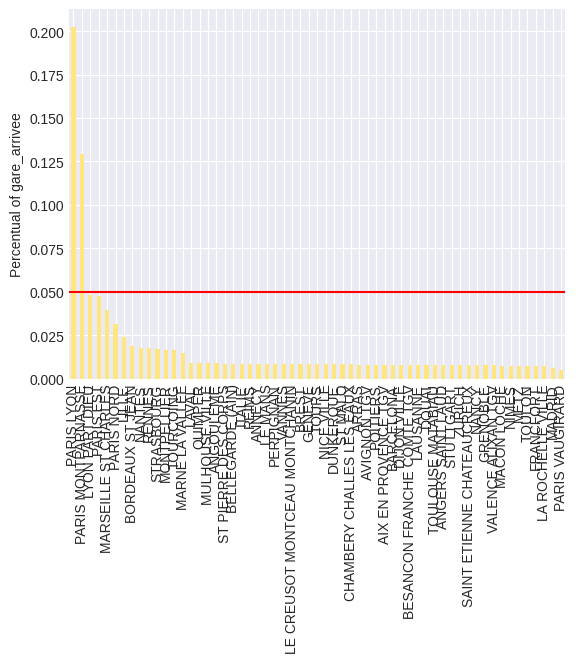

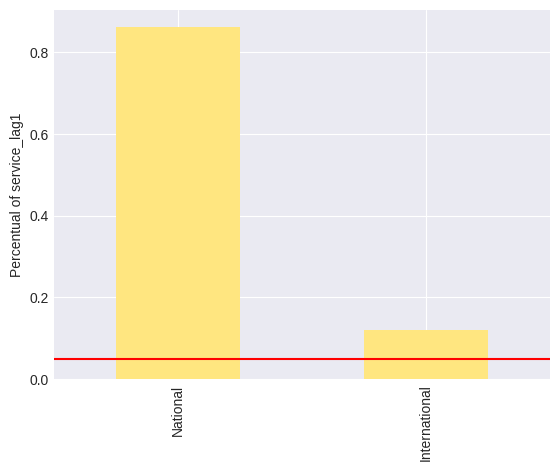

In [ ]:
verify_pct_of_categories(X_train,get_categorical_variables(X_train),['commentaires_retard_arrivee','commentaires_retard_arrivee_lag1'])

The distribution of various categories within the categorical variables reveals the following:

1. National services account for the majority of travels, representing 85% of the dataset, while international services make up the remaining 15%.

2. The distribution of departure and arrival stations exhibits a similar pattern. Notably, Paris Lyon and Paris Montparnasse emerge as the most frequented stations, collectively representing 33% of all journeys. Beyond these stations, no single station commands more than a 5% share. Stations like Paris Est, Lyon Part Dieu, and Marseille St. Charles jointly contribute 12% to the dataset.









## Distribution of Numerical Variables




Let's check the distribution of the numerical variables, trying to find possible outliers:

In [ ]:
def diagnostic_plots(df,variable,lib):
  if lib=='plotly' or lib=='Plotly':
    fig=make_subplots(rows=1, cols=3,subplot_titles=('Histogram','QQ-Graph','Box-Plot'))
    fig_hist=ff.create_distplot([df[variable].values], [variable])
    fig.add_trace(go.Histogram(fig_hist['data'][0],
                              marker_color='#FFCC00',
                              ), row=1, col=1)

    fig.add_trace(go.Scatter(fig_hist['data'][1],
                         line=dict(color='#FF851B')
                        ), row=1, col=1)
    qq = stats.probplot(df[variable], dist='norm', sparams=(1))
    x = np.array([qq[0][0][0], qq[0][0][-1]])
    qq_df=pd.DataFrame({'x':np.array(qq[0][0].tolist()),
                    'y':np.array(qq[0][1].tolist()),
                    'index':df.index.tolist()},index=None)
    fig_qq=go.Scatter(x=qq_df['x'],
                            y=qq_df['y'],
                            mode='markers',
                            name=variable,
                            text=qq_df['index'],
                            marker_color='rgba(31, 150, 139, 0.9)')

    fig_qq.update(mode='markers', marker_line_width=0.15, marker_size=5)
    fig.append_trace(fig_qq, row=1, col=2)
    fig.append_trace(go.Scatter(x=x,
                                y=qq[1][1] + qq[1][0]*x,
                                mode='lines',
                                name='Normal',
                                marker_color='rgba(255, 90, 0, 0.9)'), row=1, col=2)
    fig.layout.update(title='Variable Resume '+ variable)
    fig_box=go.Box(y=df[variable],
                  boxpoints='all',
                  jitter=0.4, # add some jitter for a better separation between points
                  boxmean='sd',
                  text=df.index.tolist(),
                  name='Box-Plot',
                  marker_color='#FFCC00',
                  line_color='#FF851B')
    fig.append_trace(fig_box, row=1, col=3)
    fig.show()

  elif lib=='matplotlib' or lib=='pyplot':
    #function takes a dataframe (df) and
    # the variable of interest as arguments

    if not df[feature].isna().all():



      # define figure size
      plt.figure(figsize=(16, 4))

      # histogram
      plt.subplot(1, 3, 1)
      sns.histplot(data=df, x=variable, kde=True,color='#E0B100',stat="density")
      plt.title('Histogram')

      # Q-Q plot
      ax=plt.subplot(1, 3, 2)
      stats.probplot(df[variable], dist="norm", plot=plt)
      ax.get_lines()[0].set_markersize(7.0)
      ax.get_lines()[0].set_markerfacecolor('#44B1A5')
      ax.get_lines()[0].set_color('#44B1A5')

      ax.get_lines()[1].set_markerfacecolor('#FF7627')
      plt.ylabel('RM quantiles')

      # boxplot
      plt.subplot(1, 3, 3)
      sns.boxplot(y=variable, data=df,color='#FFCC00',linewidth=2.5)
      sns.swarmplot(y=variable, data=df.iloc[0:300], color="#FFE680")
      plt.title('Boxplot')

      plt.suptitle('Distribution of '+ variable, fontsize=16)
      plt.show()

    else:
      print('Choose lib equals to "matplotlib" ou "plotly"!')

def get_numerical_variables(df):
    return df.select_dtypes(exclude='object').columns


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



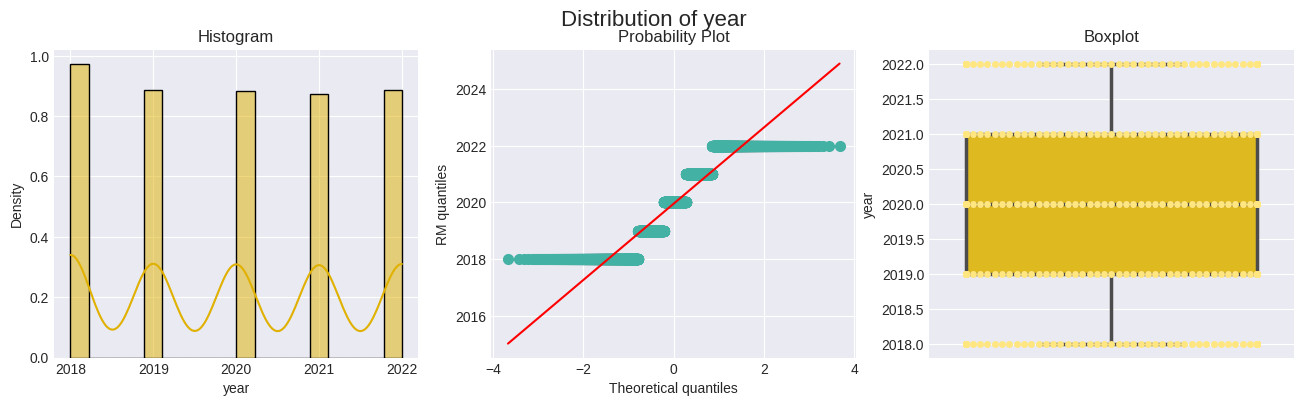

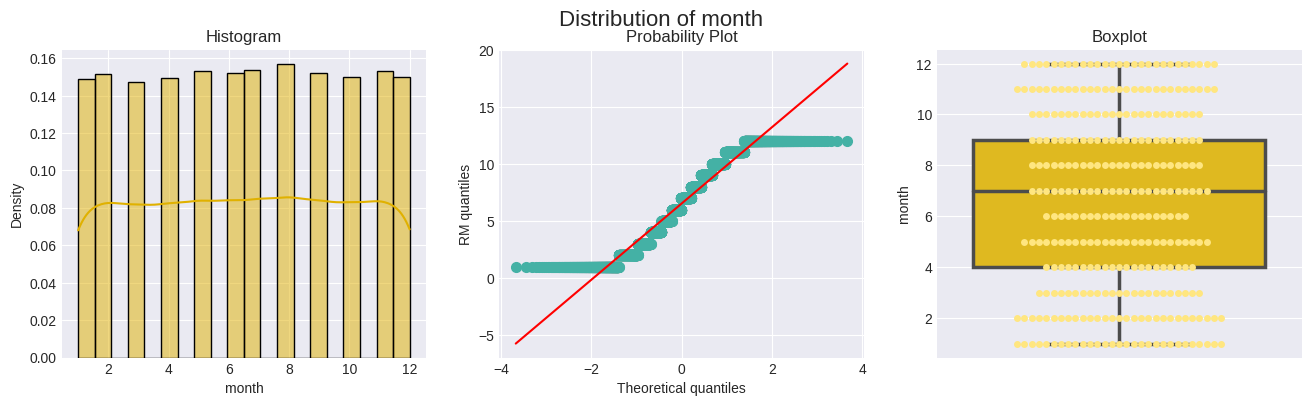

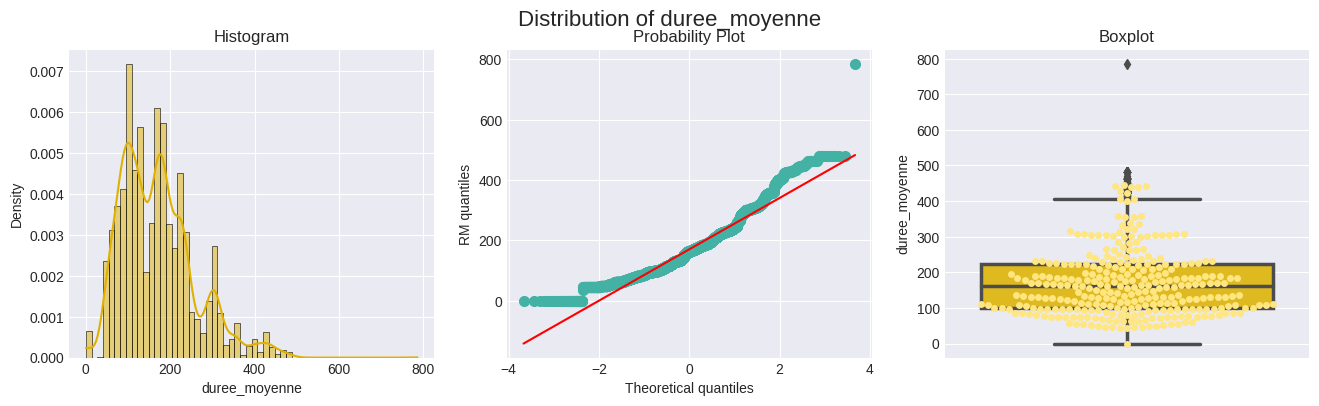

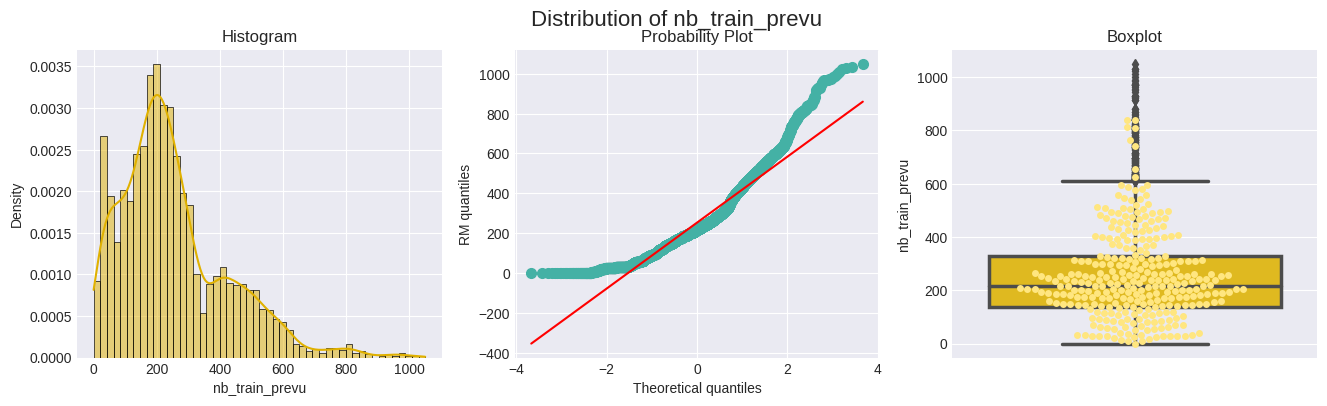

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



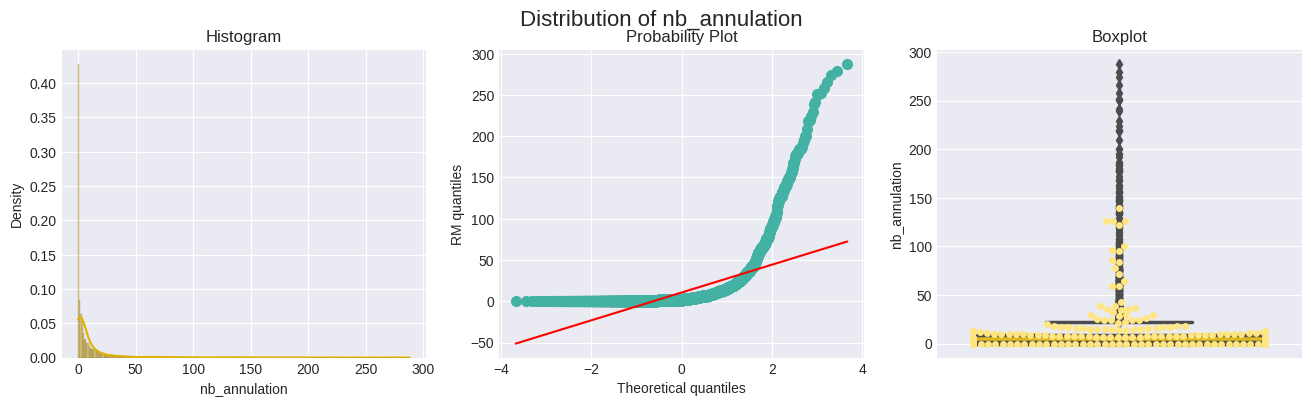

Choose lib equals to "matplotlib" ou "plotly"!


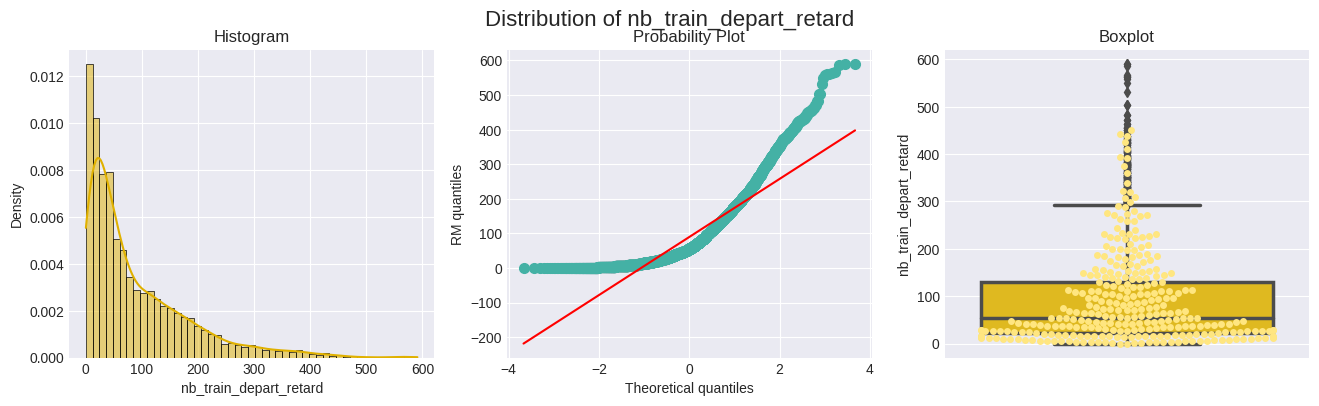

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

46.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



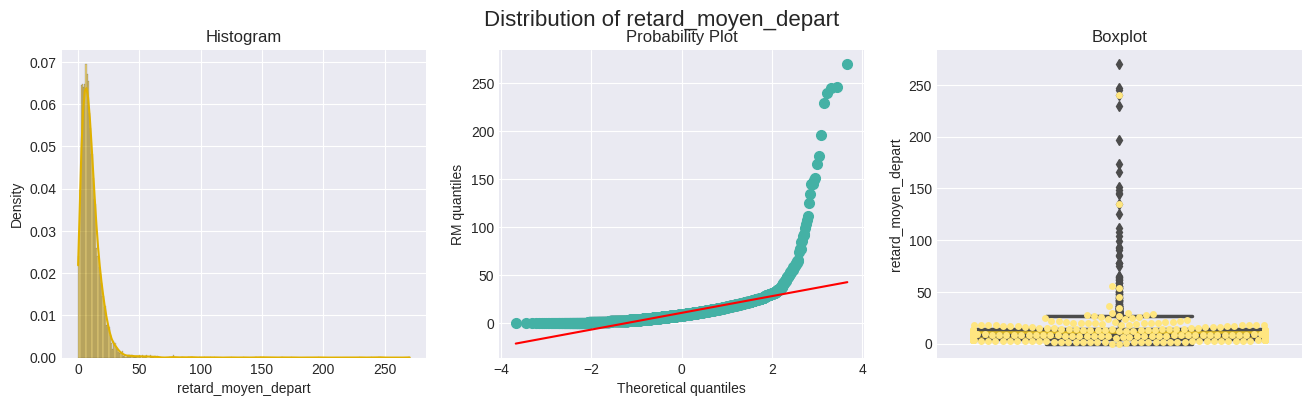

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

77.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



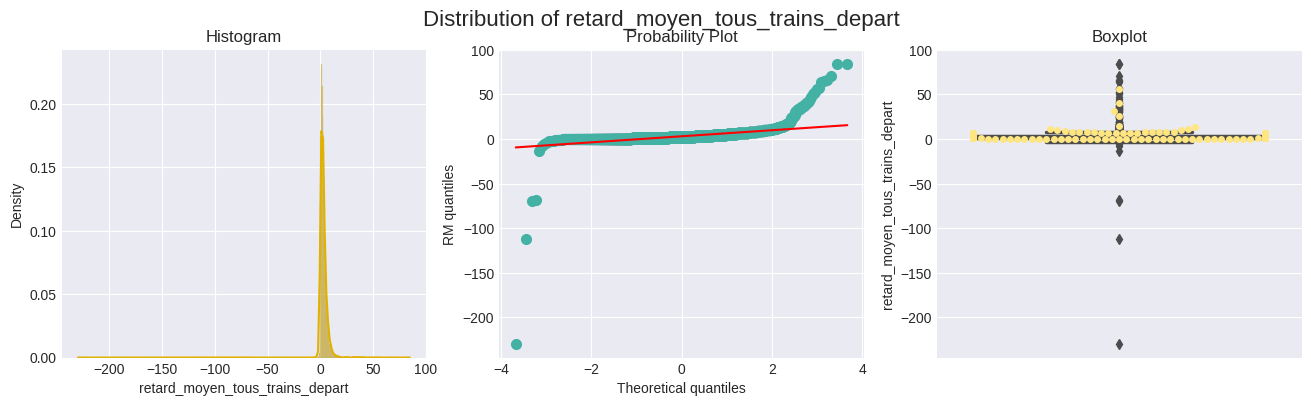

Choose lib equals to "matplotlib" ou "plotly"!


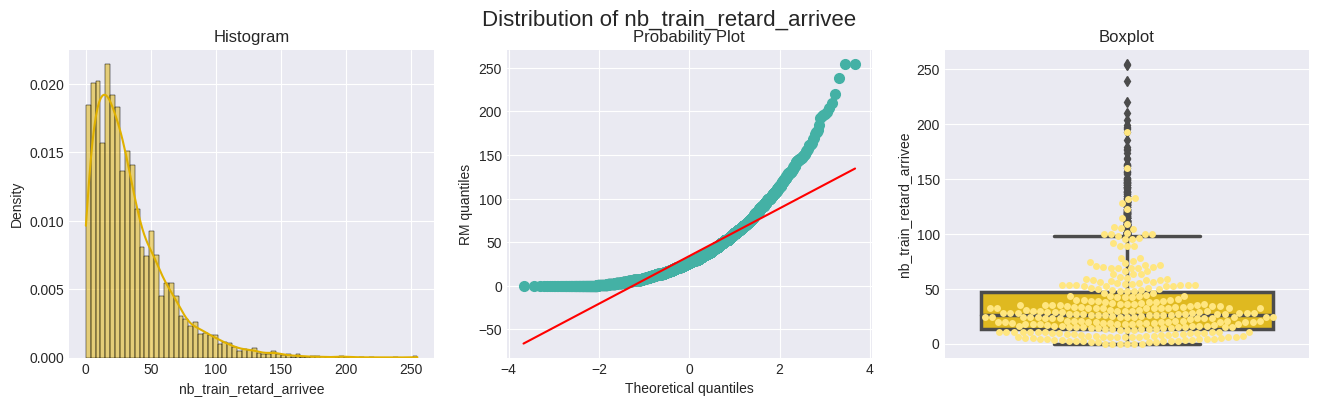

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



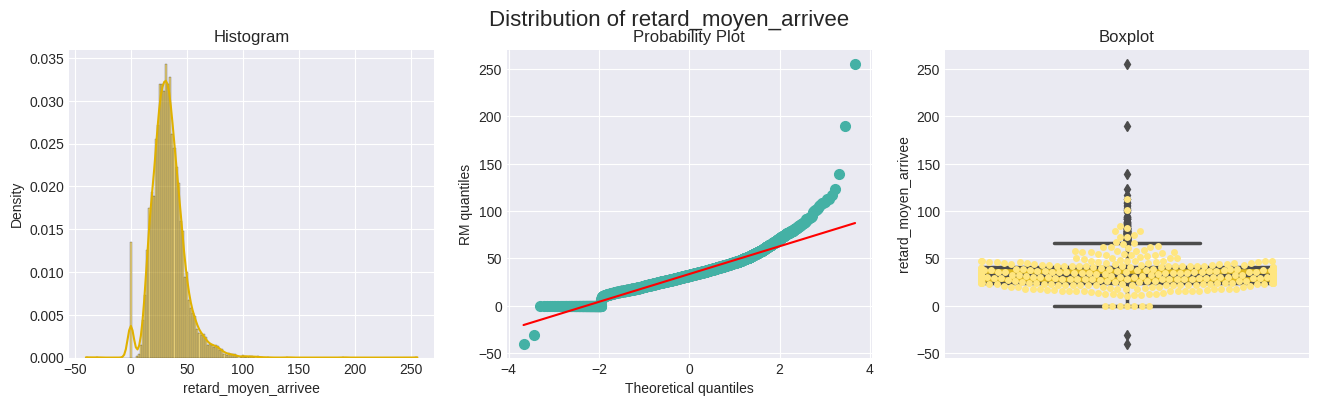

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



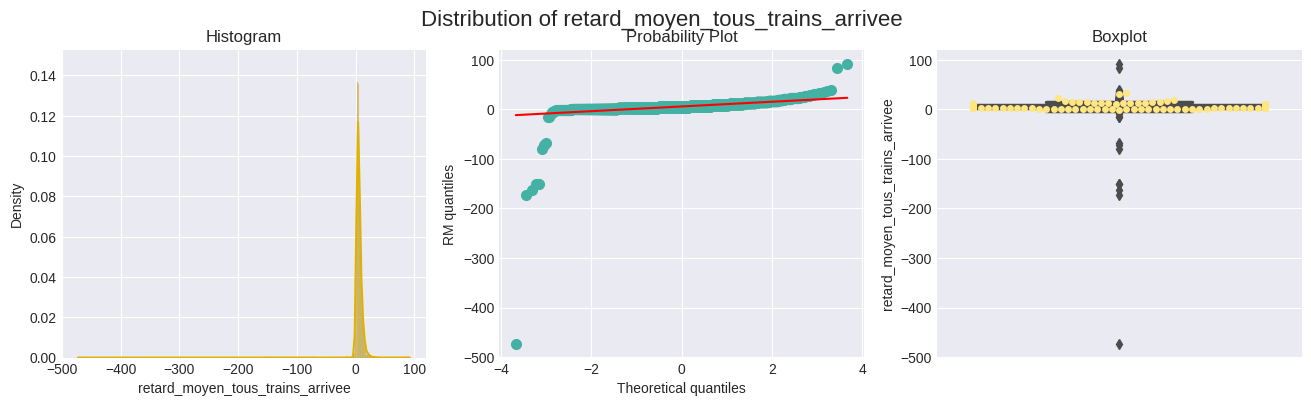

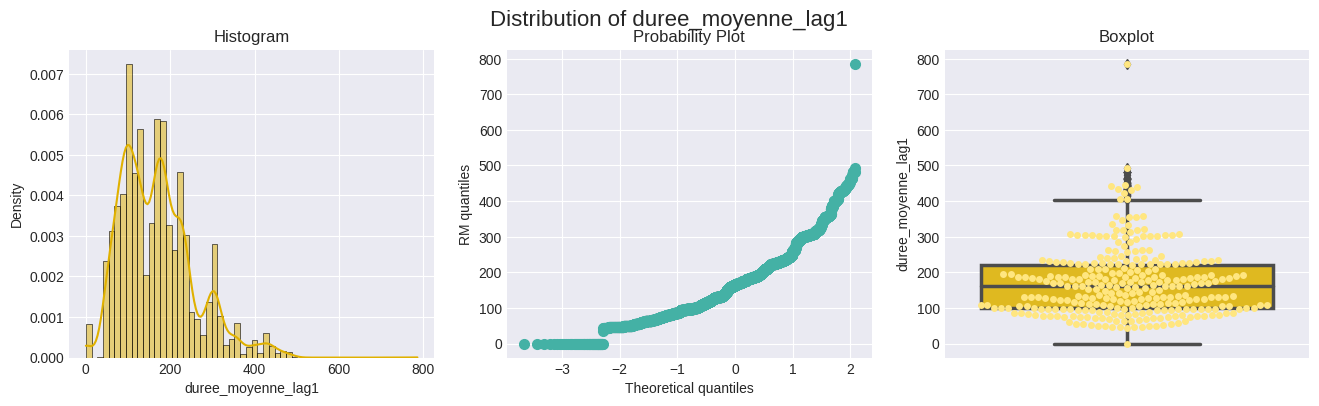

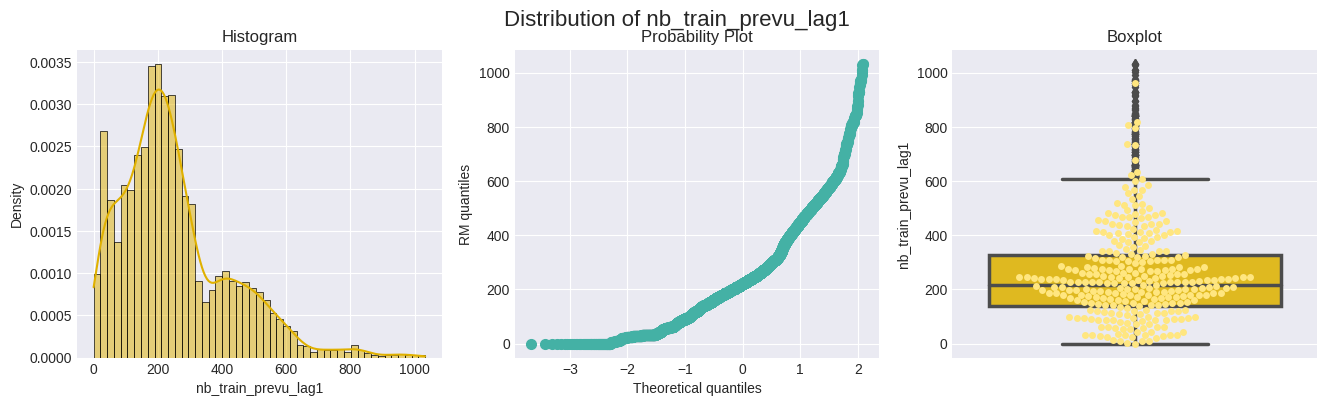

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



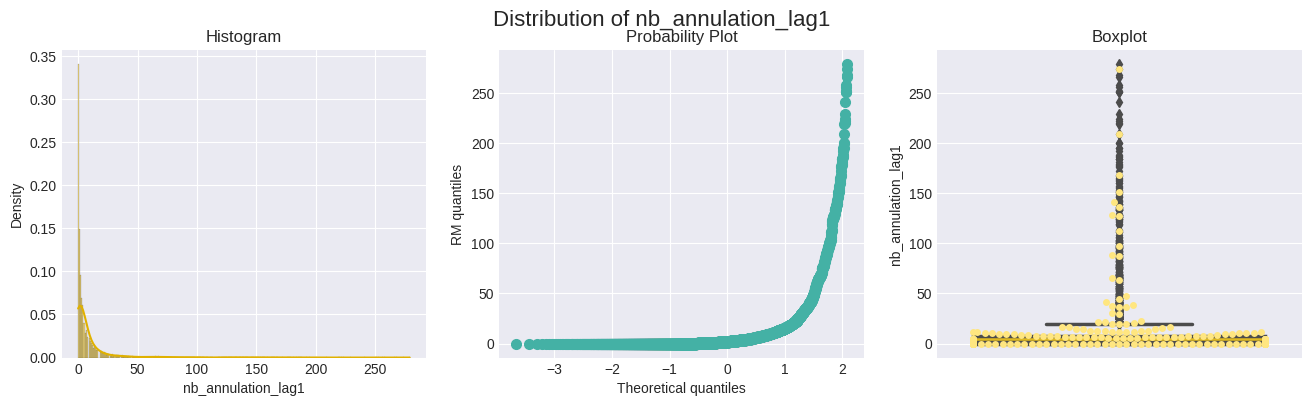

Choose lib equals to "matplotlib" ou "plotly"!


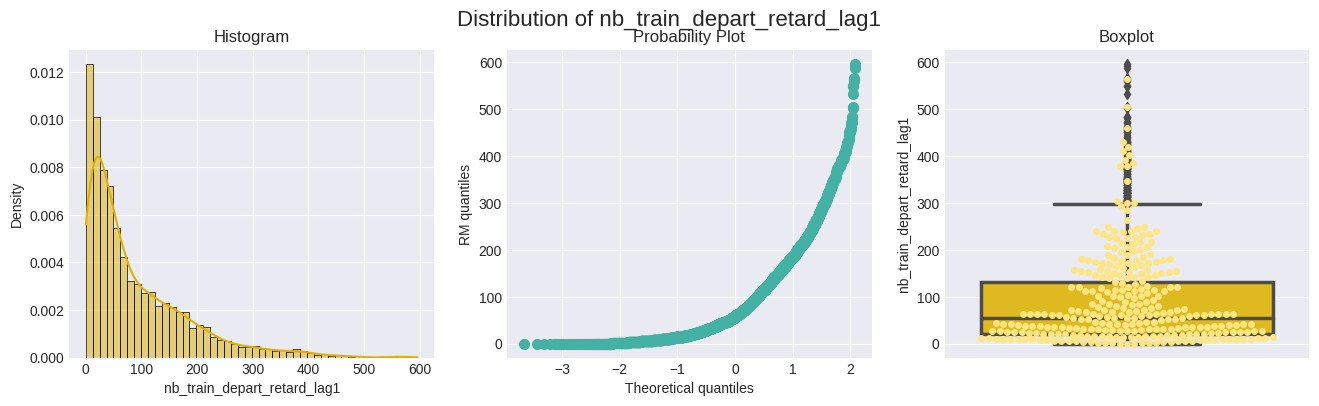

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



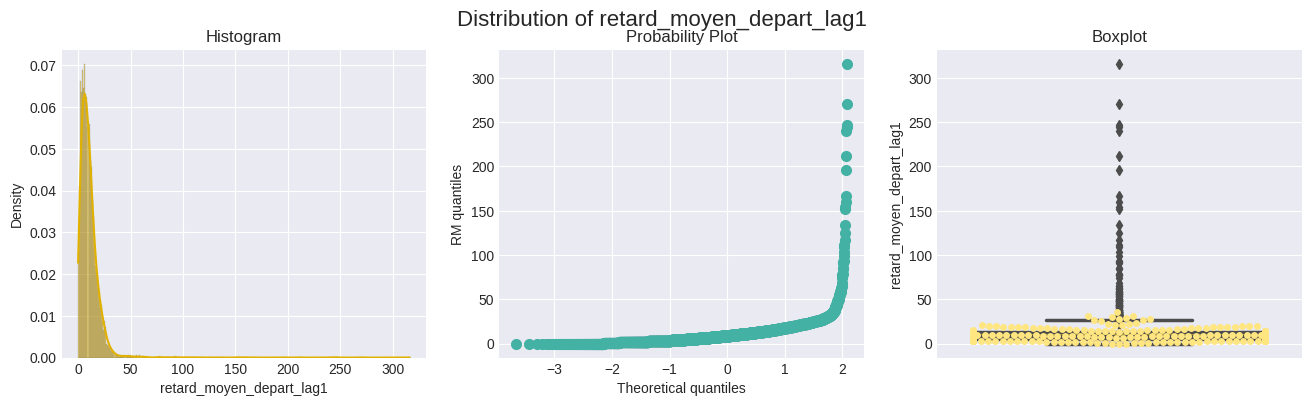

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



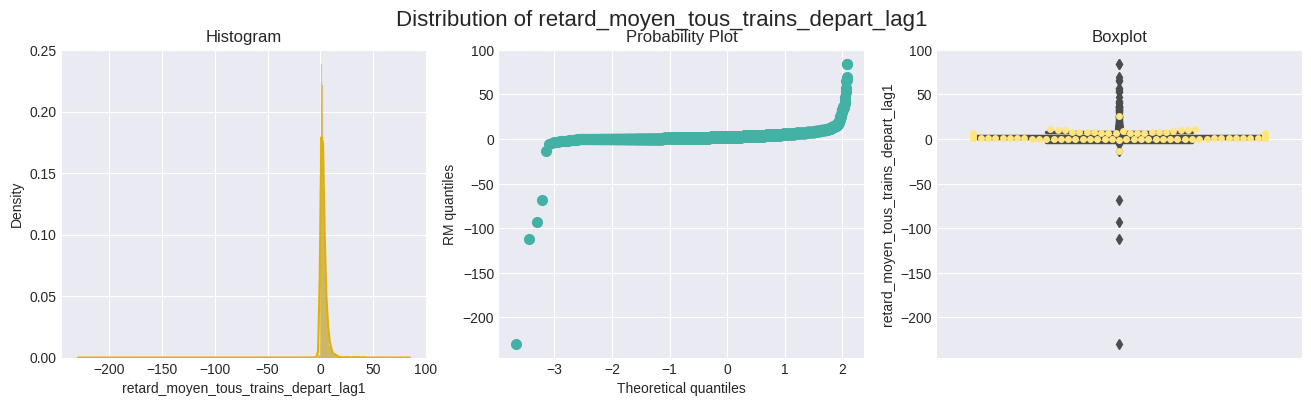

Choose lib equals to "matplotlib" ou "plotly"!


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



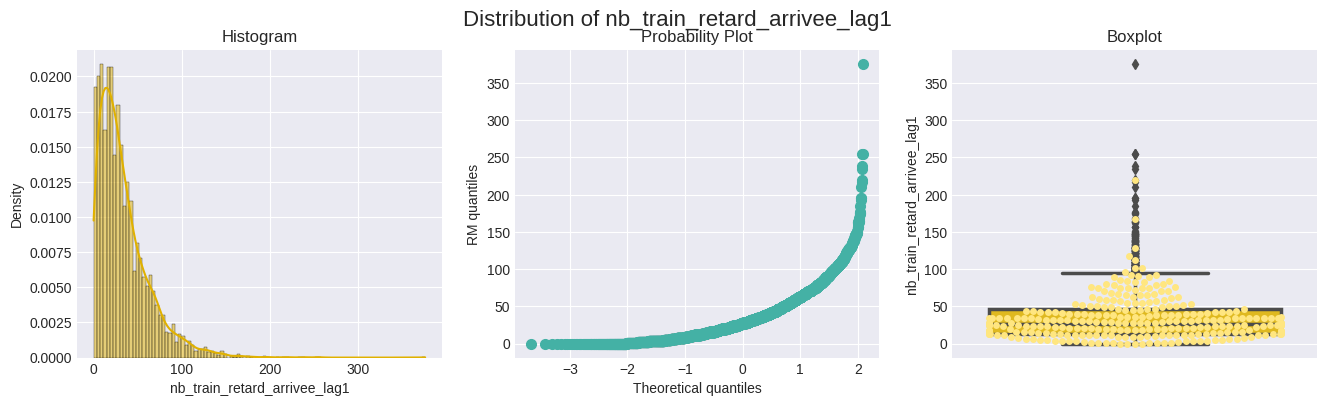

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



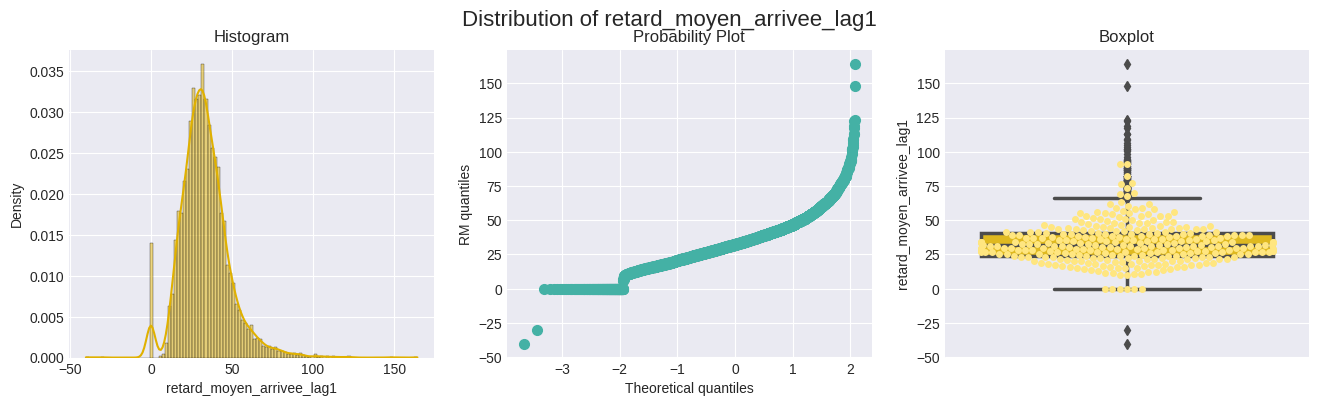

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



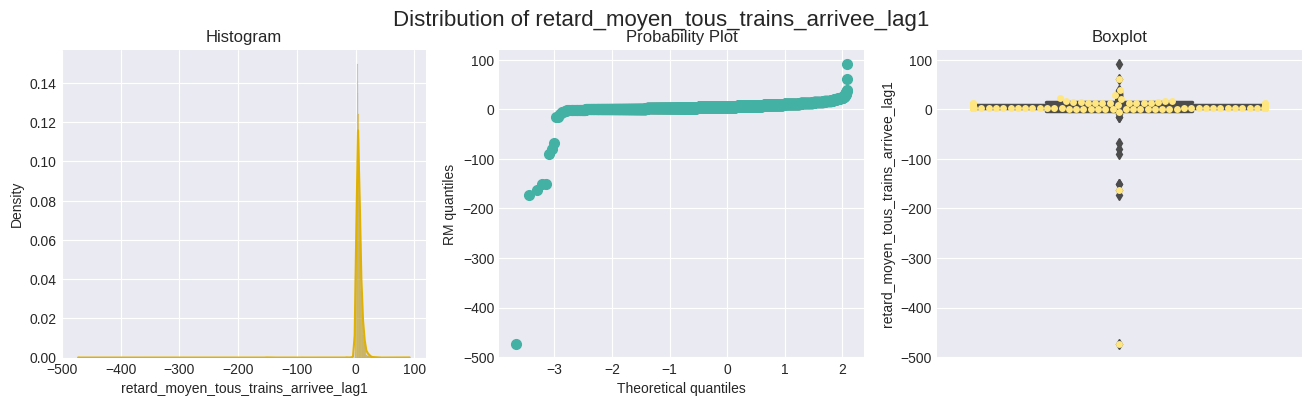

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



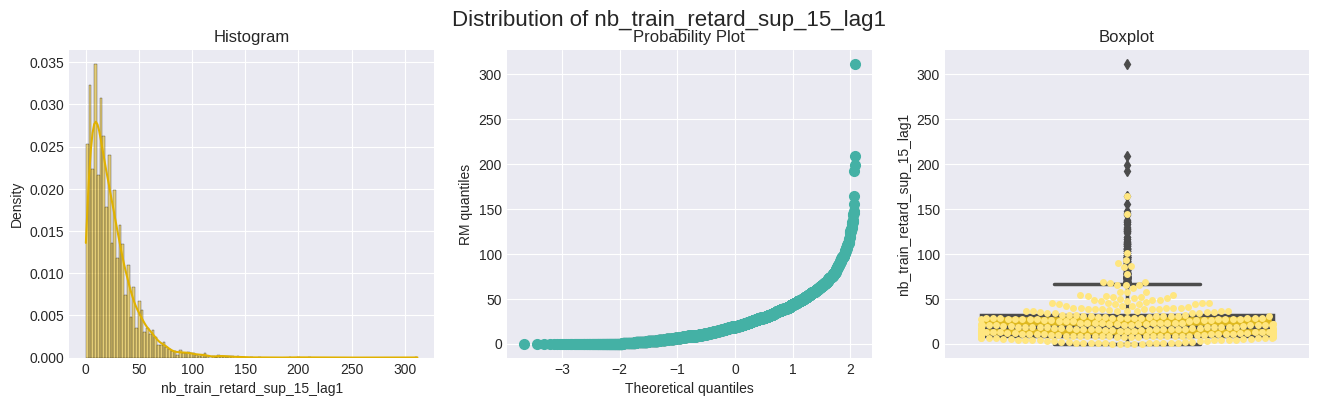

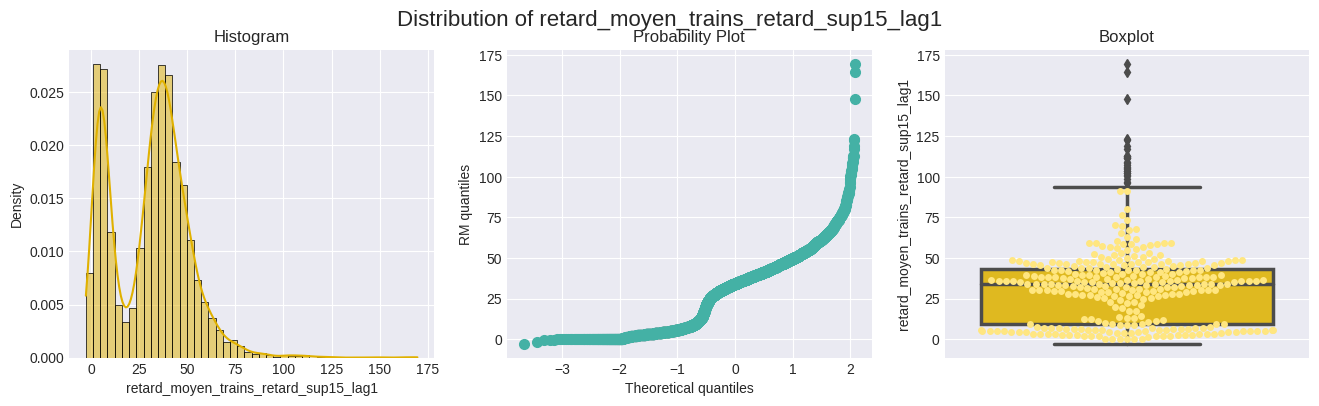

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



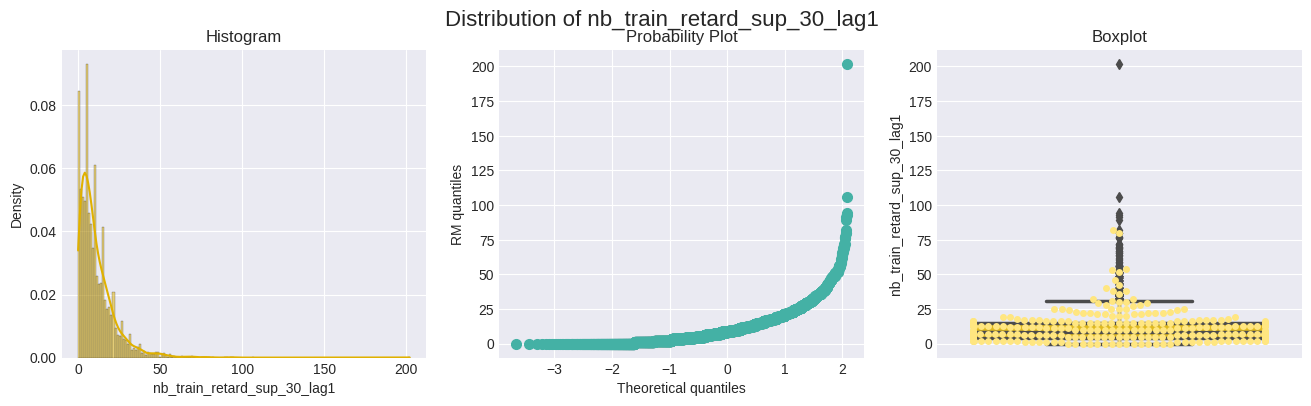

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



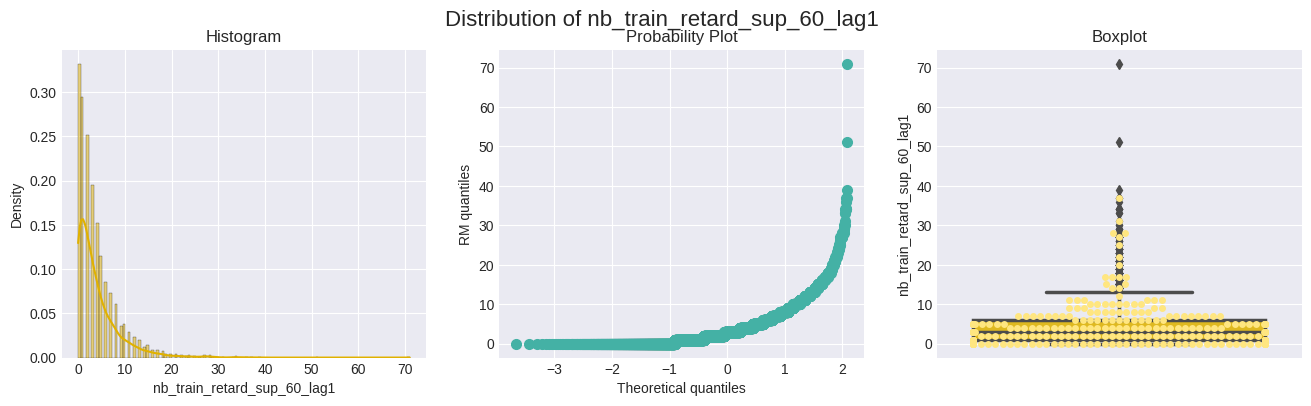

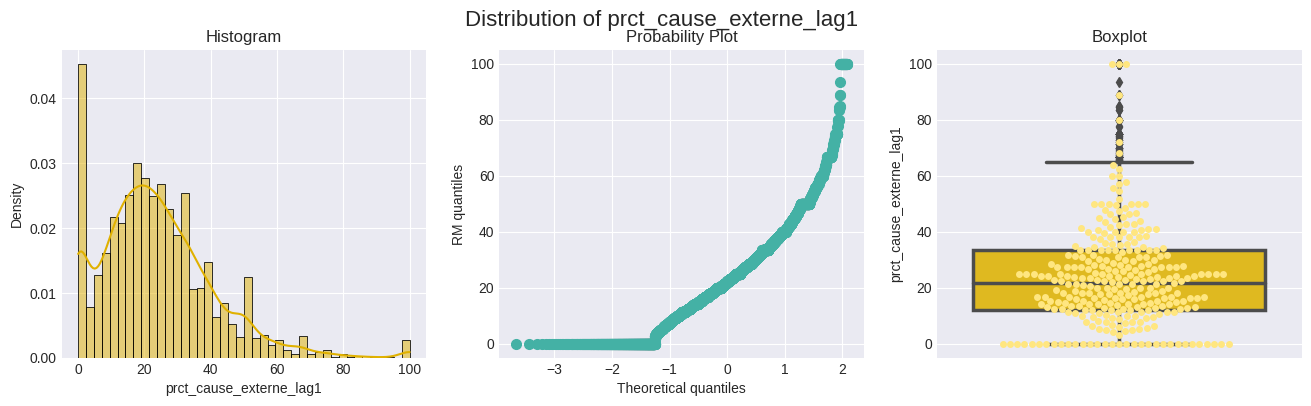

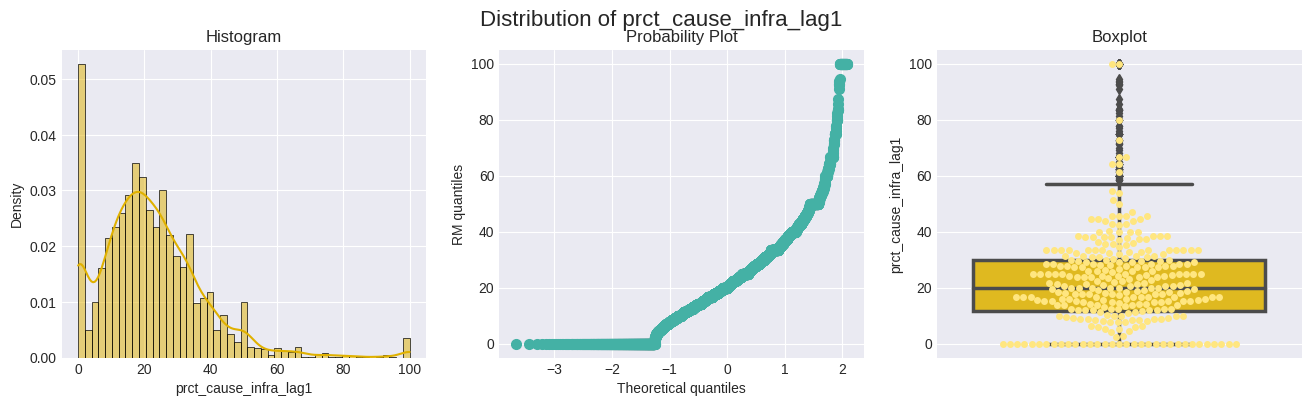

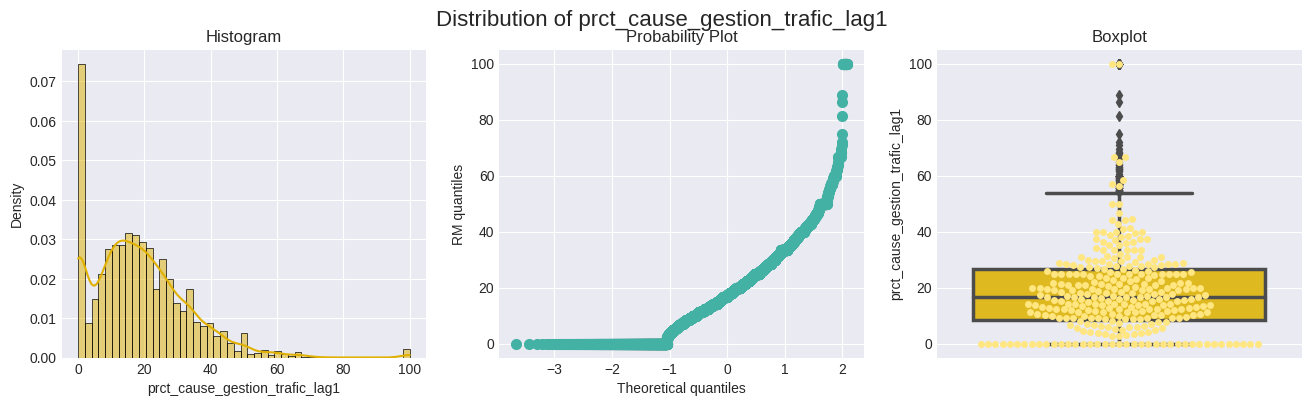

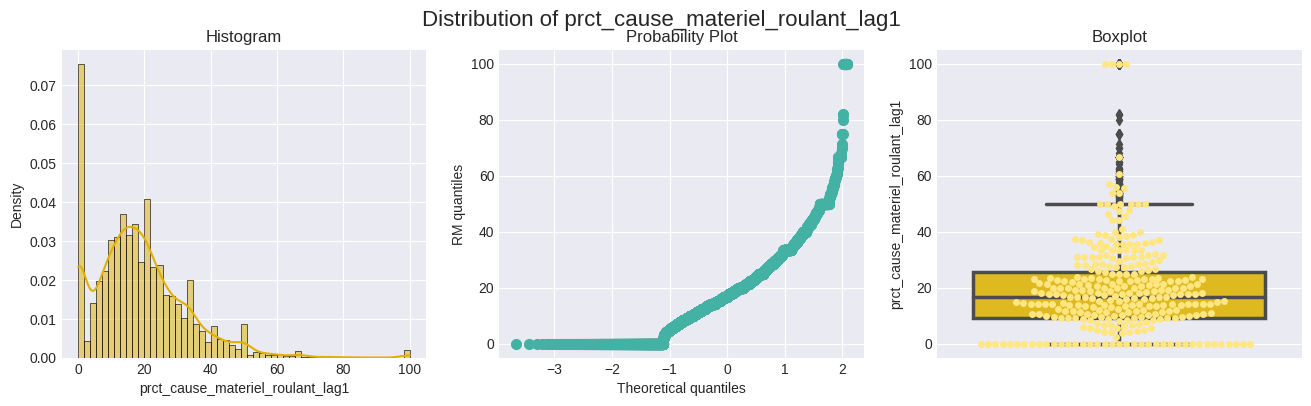

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



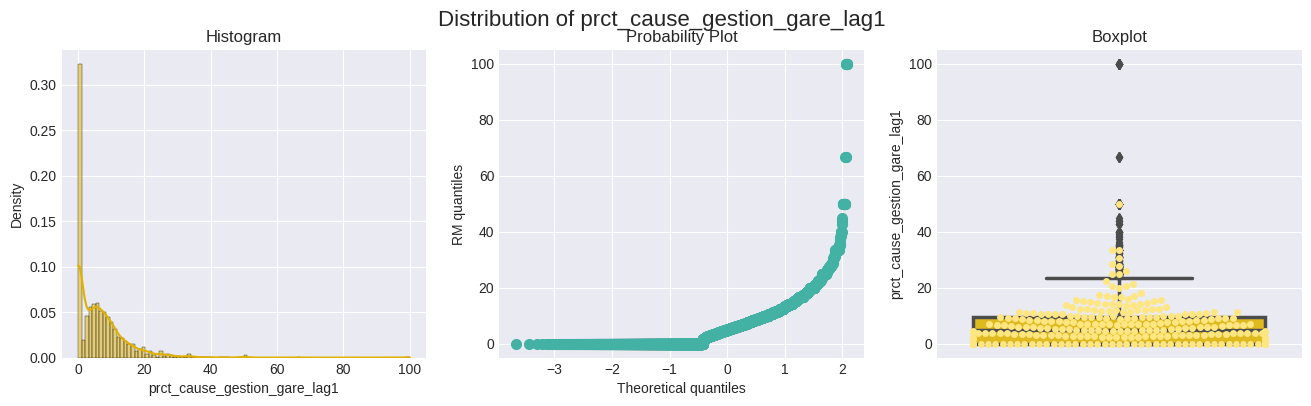

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



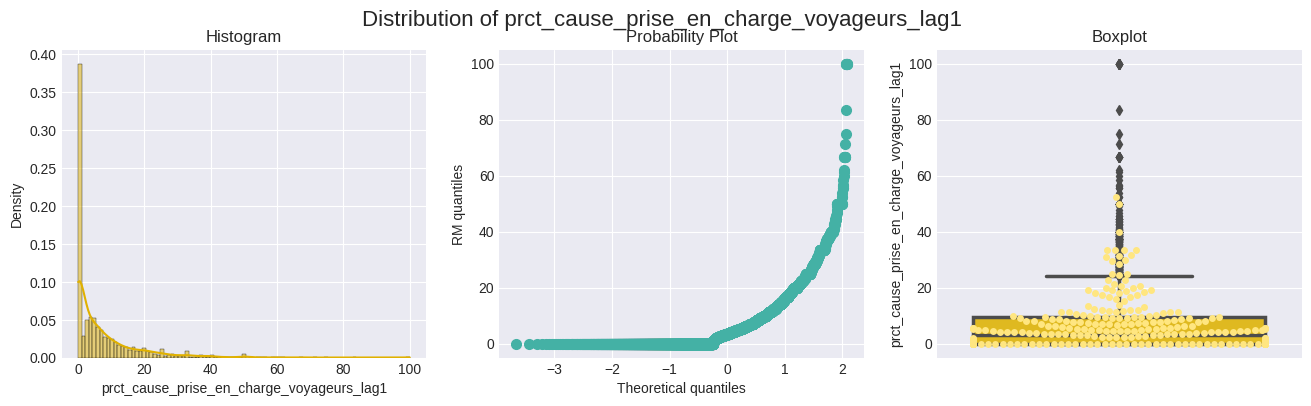

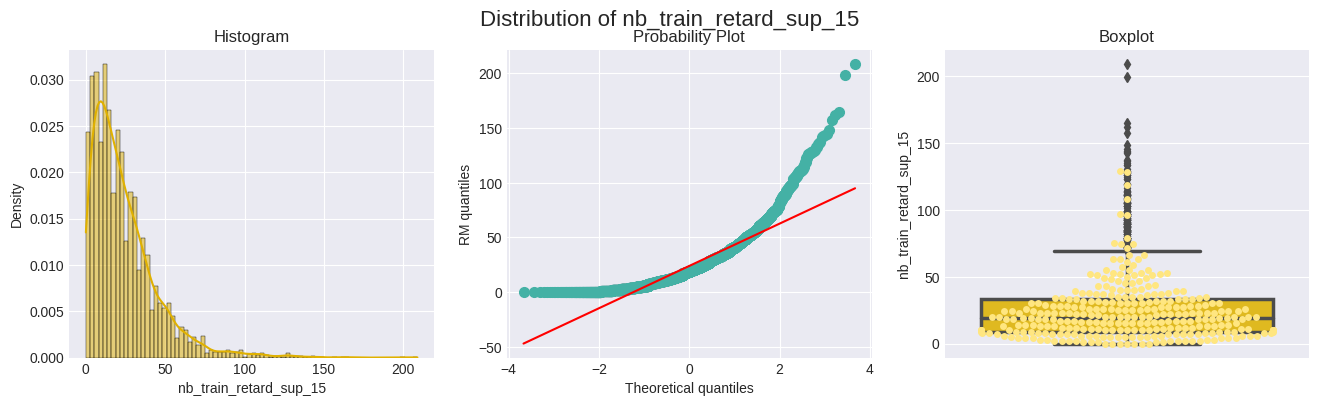

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



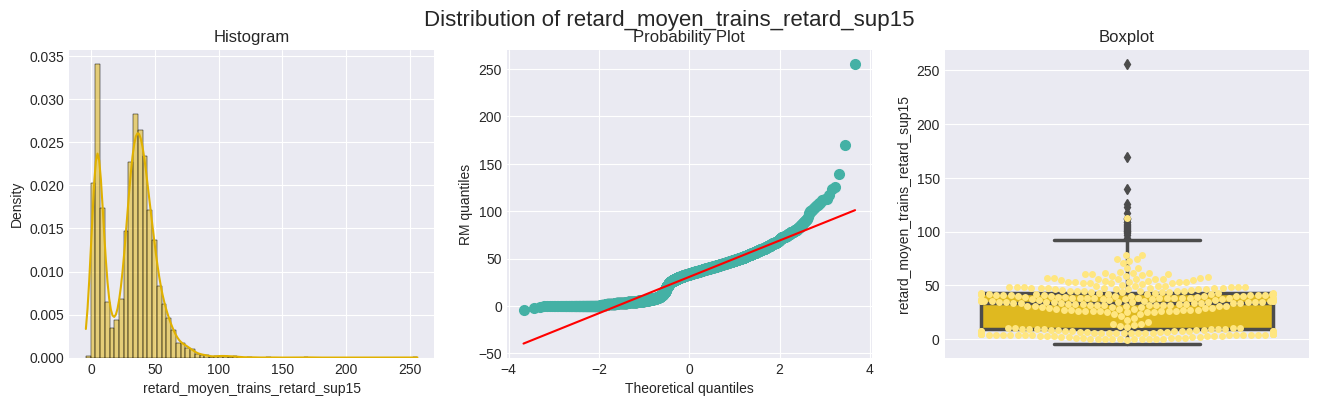

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



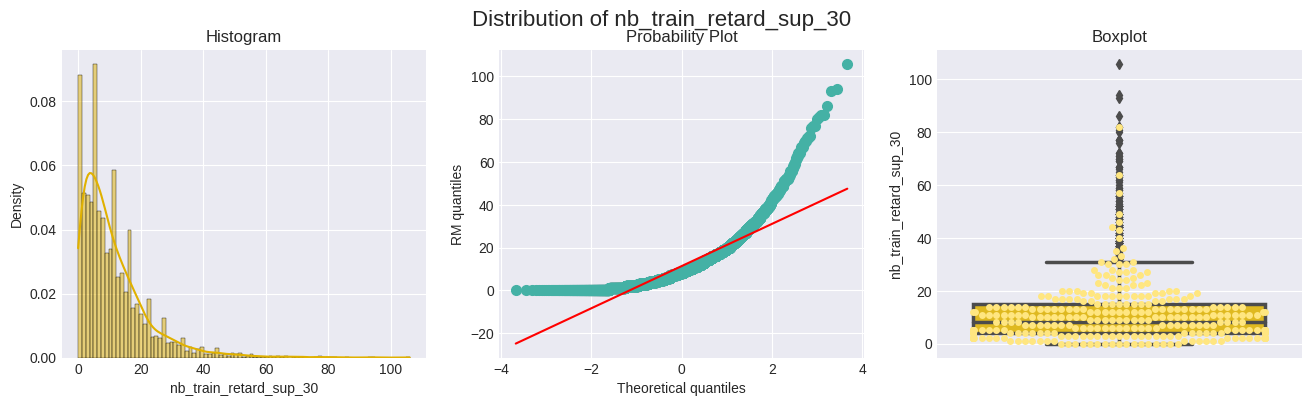

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



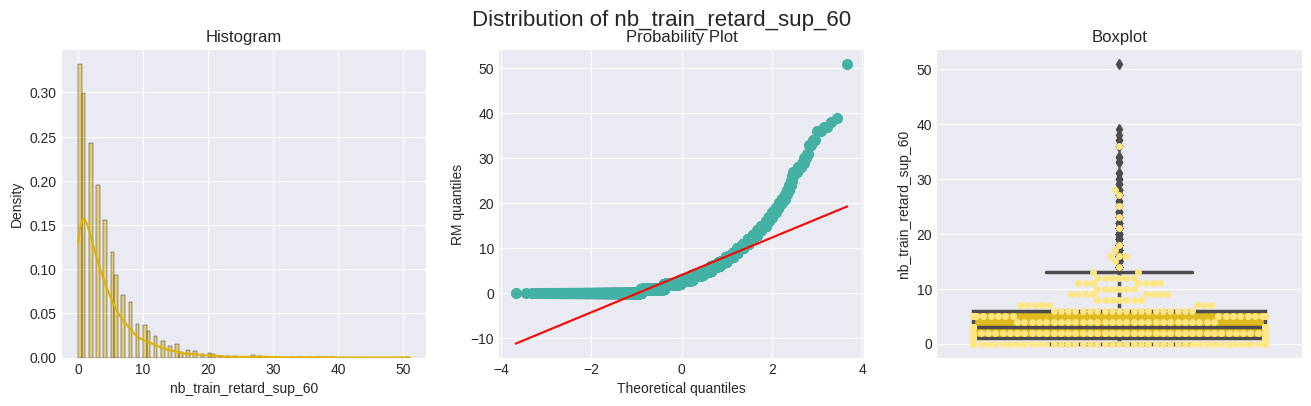

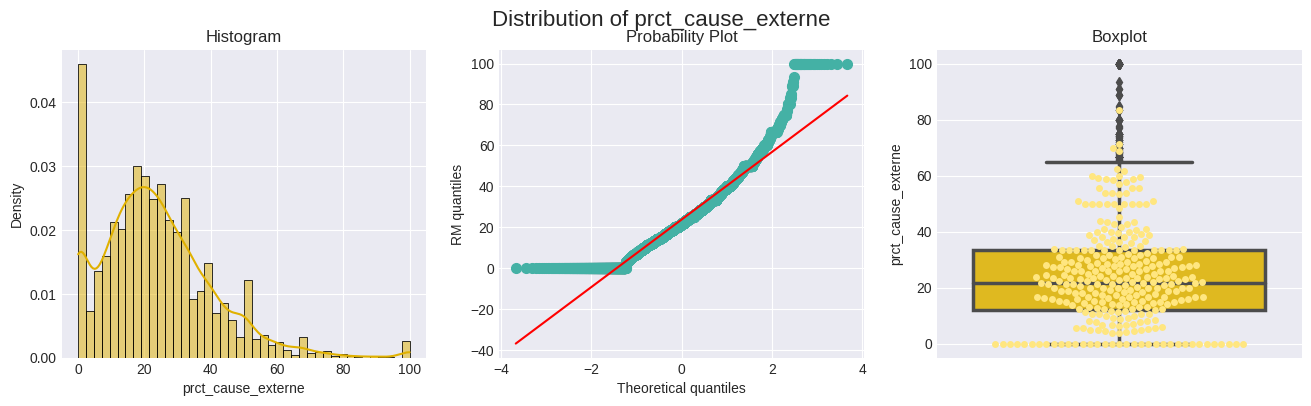

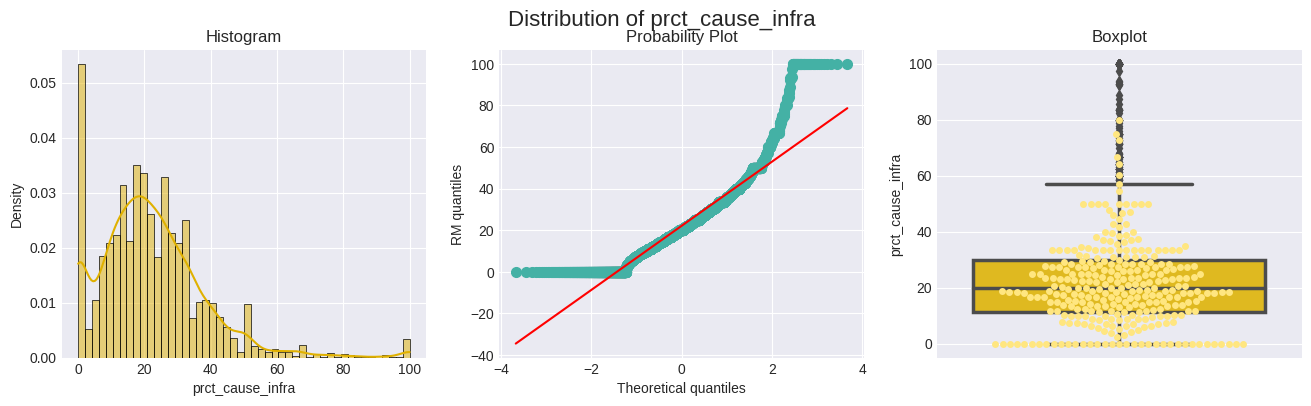

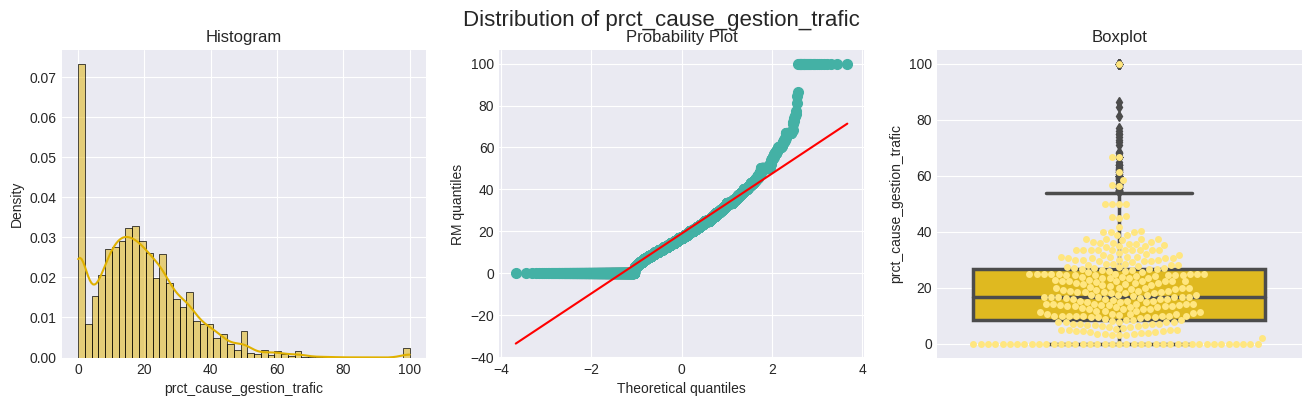

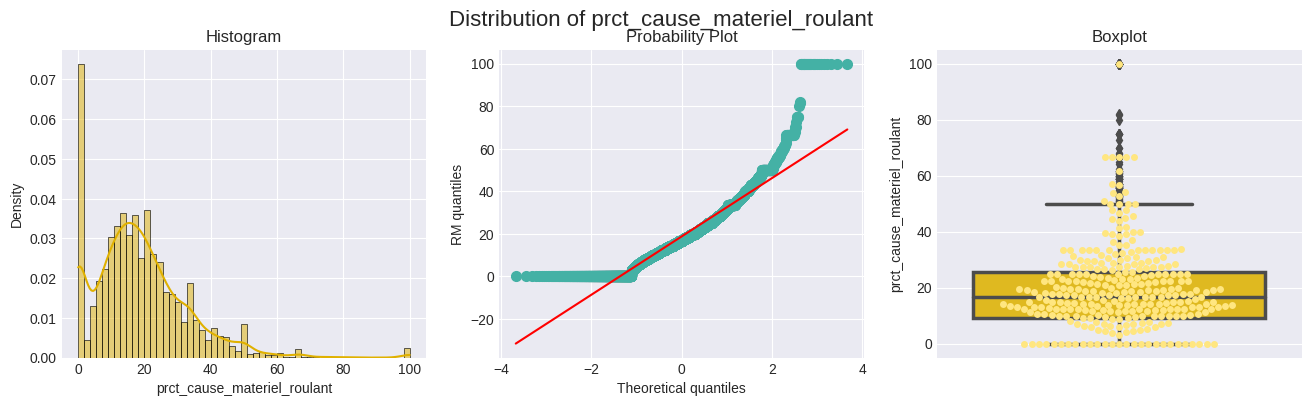

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



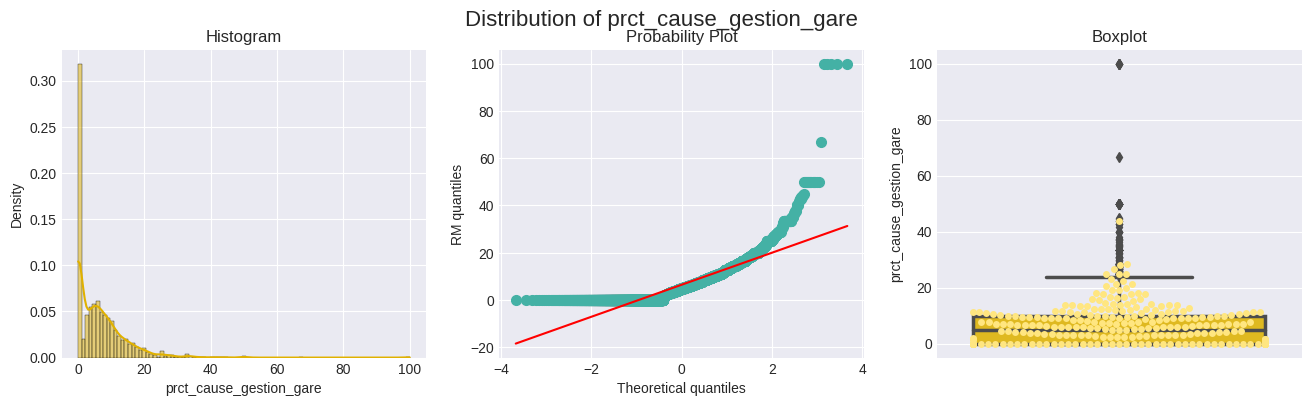

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



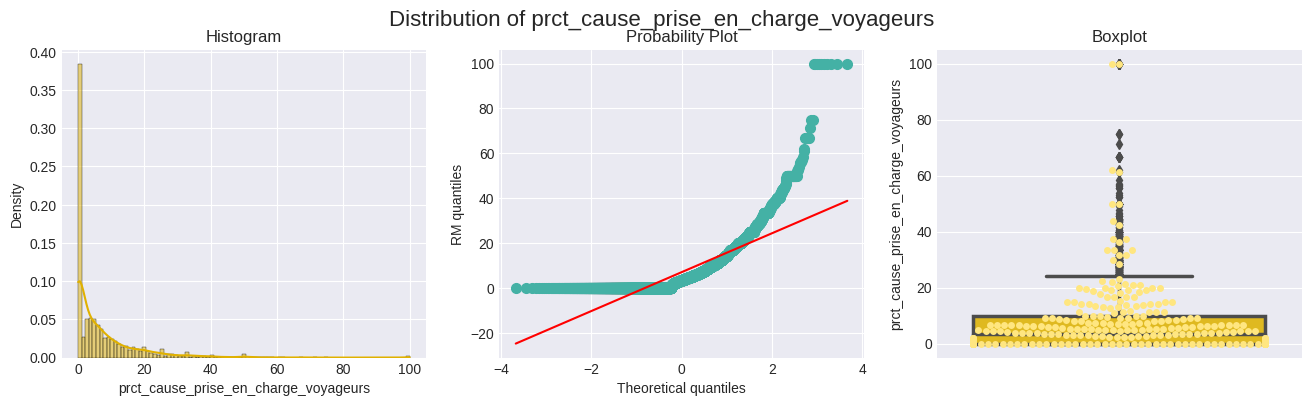

In [ ]:
for feature in get_numerical_variables(X_train):
  diagnostic_plots(X_train,feature,'matplotlib')

From the distributions, we can see that:

1. The variables Distribution_of_retard_moyen_arrivee and Distribution_of_retard_moyen_tous_trains_depart have a distribution approximately **uniform in the integers**, although in the outlayers it doesn't work this approximation.

2. The variables Distribution of nb_train depart_retard, Distribution of retard moyen_depart, Distribution_of_retard_moyen_tous_trains_depart, Distribution_of_train_retard_arrivee, Distribution_of_nb_train_depart_retard_lag, Distribution_of_retard_moyen_depart_lag1, Distribution_of_nb_train retard_arrivee_lag1 seem to have distributions similar to the **exponential** distribution, and may be Poisson or Gamma.

3. In general we see lots of outliers.


